# Analysis of the 50 Largest Companies by Revenue

## Introduction
The purpose of this analysis is to investigate market inequality among the 50 largest companies by revenue.
The data sources from the official Wikipedia webpage (https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue), containing key financial indicators such as:
- Company Name
- Industry
- Revenue (USD Millions)
- Revenue Increase
- Profit (USD Millions)
- Employees
- Headquarters
- State-owned

## Methodology
The data has been parsed directly from a "List of largest companies by revenue" article. The following steps were taken:
- Data extraction using requests and BeautifulSoup
- Data cleaning using pandas
- Descriptive statistics used to summarize key metrics
- Visualizations and relationships between variables using seaborn and matplotlib
- Lorenz curve and Gini coefficient to measure income distribution inequality

## Importing libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
sns.set_theme()
warnings.simplefilter(action='ignore', category=FutureWarning)

## Parsing the data

In [2]:
data = []

def parse(url):
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'lxml')

    table = soup.find('tbody')
    rows = table.find_all('tr')

    for row in rows:
        cells = row.find_all('td')

        if len(cells) >= 8:
            company_info = {
                'name': cells[0].find('a').text.replace('\n', ''),
                'industry': cells[1].find('a').text.replace('\n', ''),
                'revenue (millions)': cells[2].text.replace('\n', ''),
                'revenue_increase': 'yes' if cells[2].find('span', title='Increase') else 'no',
                'profit (millions)': cells[3].text.replace('\n', ''),
                'employees': cells[4].text.replace('\n', ''),
                'headquarters': cells[5].text.replace('\n', '').strip(),
                'state-owned': 'no' if cells[6].find('span', title='No') else 'yes',
            }

            data.append(company_info)

    return data

In [3]:
def main():
    parse('https://en.wikipedia.org/wiki/List_of_largest_companies_by_revenue')

In [4]:
if __name__ == '__main__':
    main()
    
df = pd.DataFrame(data)
df.head()

,name,industry,revenue (millions),revenue_increase,profit (millions),employees,headquarters,state-owned
0,Walmart,Retail,"$648,125",yes,"$15,511","2,100,000",United States,no
1,Amazon,Retail,"$574,785",yes,"$30,425","1,525,000",United States,no
2,State Grid Corporation of China,Electricity,"$545,948",yes,"$9,204","1,361,423",China,yes
3,Saudi Aramco,Oil and gas,"$494,890",no,"$129,699","73,311",Saudi Arabia,yes
4,China Petrochemical Corporation,Oil and gas,"$429,700",no,"$9,393","513,434",China,yes


## Data cleaning

In [5]:
df.shape

(50, 8)

In [6]:
df.dtypes

name                  object
industry              object
revenue (millions)    object
revenue_increase      object
profit (millions)     object
employees             object
headquarters          object
state-owned           object
dtype: object

In [7]:
df.isna().sum()

name                  0
industry              0
revenue (millions)    0
revenue_increase      0
profit (millions)     0
employees             0
headquarters          0
state-owned           0
dtype: int64

In [8]:
dollar_col = df[['revenue (millions)', 'profit (millions)']].columns.tolist()

df[dollar_col] = df[dollar_col].applymap(lambda x: x.replace('$', '').replace(',', ''))
df.employees = df.employees.apply(lambda x: x.replace(',', ''))
df['profit (millions)'] = df['profit (millions)'].apply(lambda x: x.replace('−', '-').replace('–', '-'))

df.head()

,name,industry,revenue (millions),revenue_increase,profit (millions),employees,headquarters,state-owned
0,Walmart,Retail,648125,yes,15511,2100000,United States,no
1,Amazon,Retail,574785,yes,30425,1525000,United States,no
2,State Grid Corporation of China,Electricity,545948,yes,9204,1361423,China,yes
3,Saudi Aramco,Oil and gas,494890,no,129699,73311,Saudi Arabia,yes
4,China Petrochemical Corporation,Oil and gas,429700,no,9393,513434,China,yes


In [9]:
df['profit (millions)'] = pd.to_numeric(df['profit (millions)'], errors='coerce')
df['profit (millions)'].dtype
df.head()

,name,industry,revenue (millions),revenue_increase,profit (millions),employees,headquarters,state-owned
0,Walmart,Retail,648125,yes,15511,2100000,United States,no
1,Amazon,Retail,574785,yes,30425,1525000,United States,no
2,State Grid Corporation of China,Electricity,545948,yes,9204,1361423,China,yes
3,Saudi Aramco,Oil and gas,494890,no,129699,73311,Saudi Arabia,yes
4,China Petrochemical Corporation,Oil and gas,429700,no,9393,513434,China,yes


In [10]:
df = df.astype({'revenue (millions)': 'float', 'employees': 'int'})

In [11]:
df.dtypes

name                   object
industry               object
revenue (millions)    float64
revenue_increase       object
profit (millions)       int64
employees               int32
headquarters           object
state-owned            object
dtype: object

In [12]:
df.nunique()

name                  50
industry              12
revenue (millions)    49
revenue_increase       2
profit (millions)     50
employees             50
headquarters          12
state-owned            2
dtype: int64

In [13]:
df.industry.value_counts()

Oil and gas               8
Healthcare                8
Financials                8
Automotive                7
Retail                    5
Commodities               3
Information technology    3
Construction              3
Electronics               2
Electricity               1
Conglomerate              1
Steel                     1
Name: industry, dtype: int64

In [14]:
df.headquarters.value_counts()

United States     23
China             12
Germany            4
Switzerland        2
United Kingdom     2
Saudi Arabia       1
Japan              1
Singapore          1
France             1
Netherlands        1
South Korea        1
Taiwan             1
Name: headquarters, dtype: int64

## Descriptive statistics

In [15]:
df.describe(include=np.number)

,revenue (millions),profit (millions),employees
count,50.000000,50.000000,5.000000e+01
mean,268814.580000,23639.720000,3.436318e+05
std,119885.445333,27694.081221,3.992434e+05
min,153999.000000,261.000000,1.560000e+03
25%,177390.750000,5369.750000,1.026842e+05
50%,215430.500000,15328.000000,2.481000e+05
75%,339232.250000,29447.500000,3.930985e+05
max,648125.000000,129699.000000,2.100000e+06


In [16]:
df.describe(include='object')

,name,industry,revenue_increase,headquarters,state-owned
count,50,50,50,50,50
unique,50,12,2,12,2
top,Walmart,Oil and gas,yes,United States,no
freq,1,8,32,23,36


## Exploratory Data Analysis: Visualizations

### Bar plots

Text(0.5, 0, '')

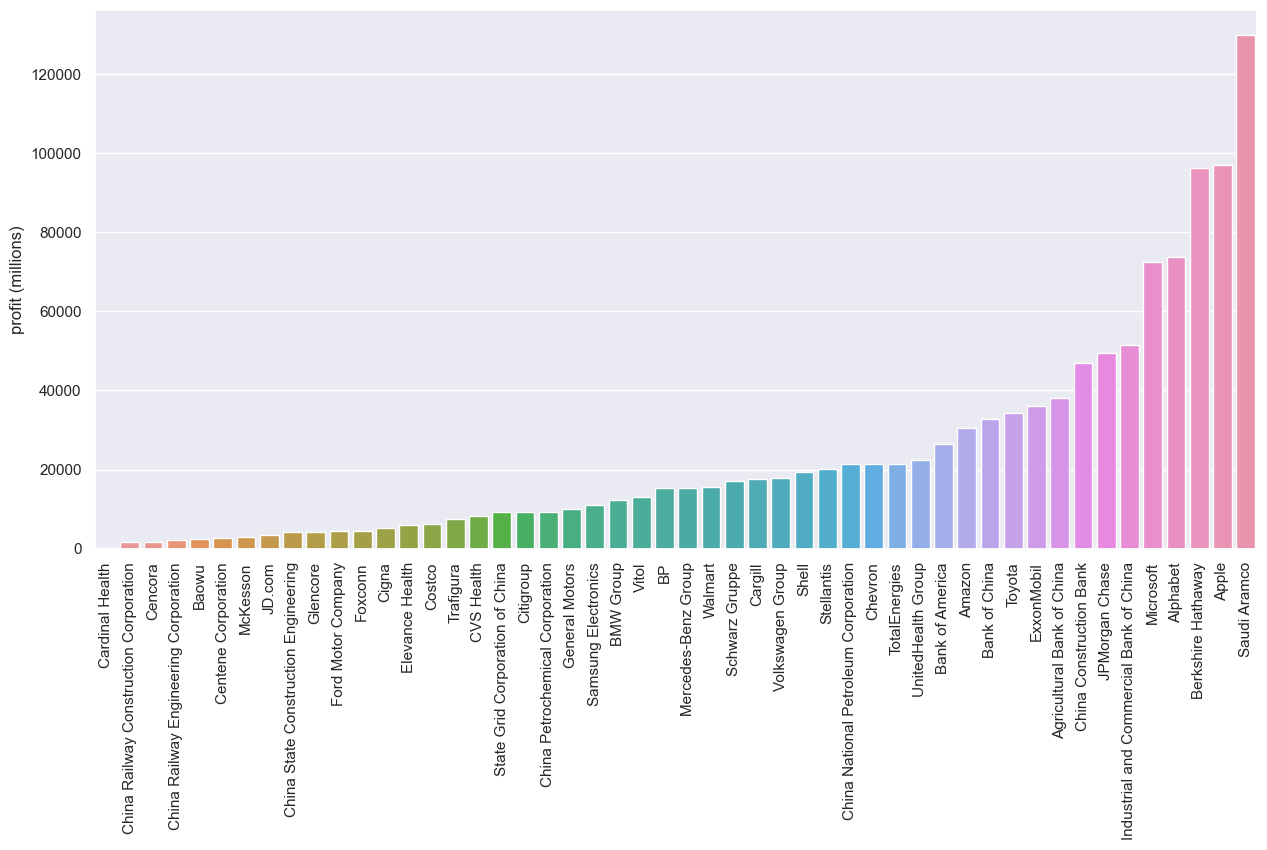

In [17]:
df_sorted_profit = df.sort_values('profit (millions)')

plt.figure(figsize=(15,7))
sns.barplot(x=df_sorted_profit.name, y=df_sorted_profit['profit (millions)'])
plt.xticks(rotation=90)
plt.xlabel('')

Text(0.5, 0, '')

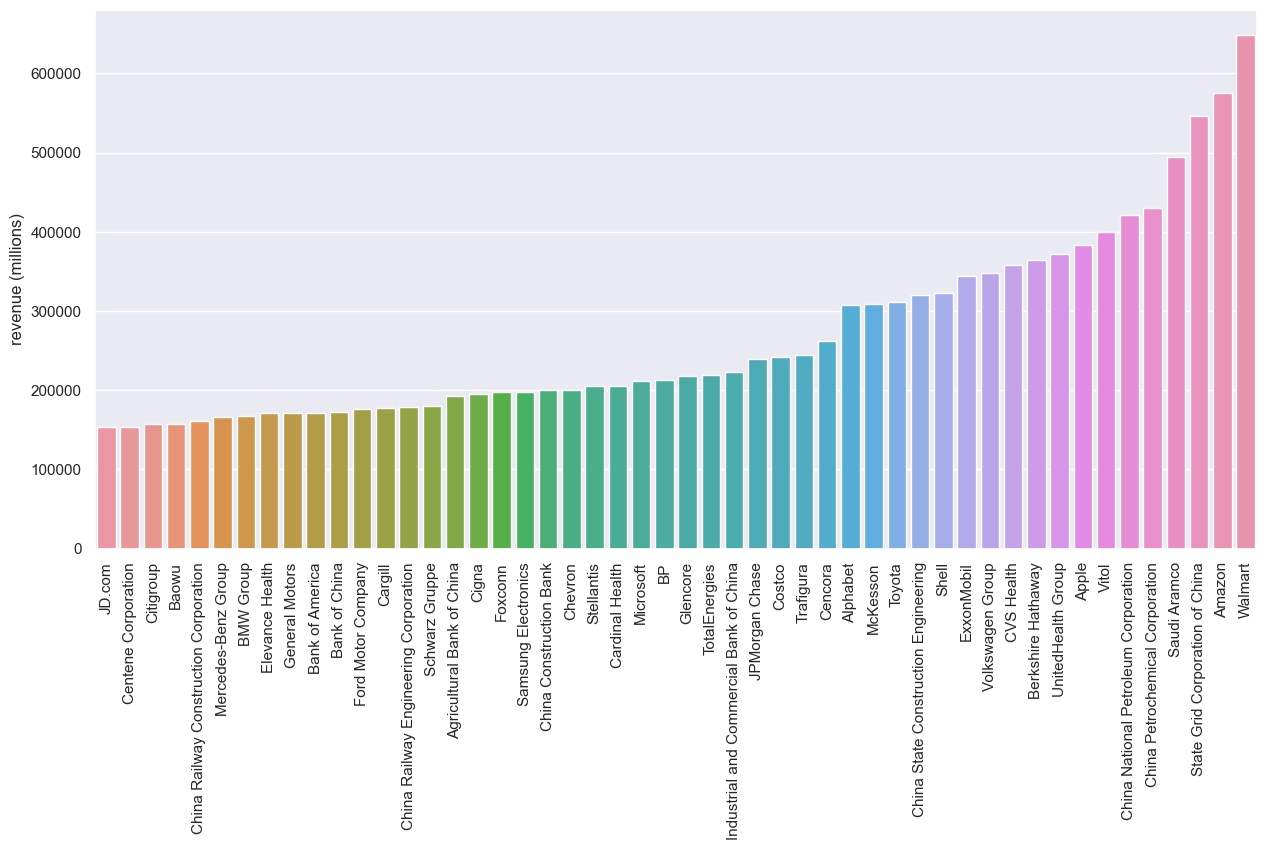

In [18]:
df_sorted_revenue = df.sort_values('revenue (millions)')

plt.figure(figsize=(15,7))
sns.barplot(x=df_sorted_revenue.name, y=df_sorted_revenue['revenue (millions)'])
plt.xticks(rotation=90)
plt.xlabel('')

Text(0.5, 1.0, 'Count of Industries')

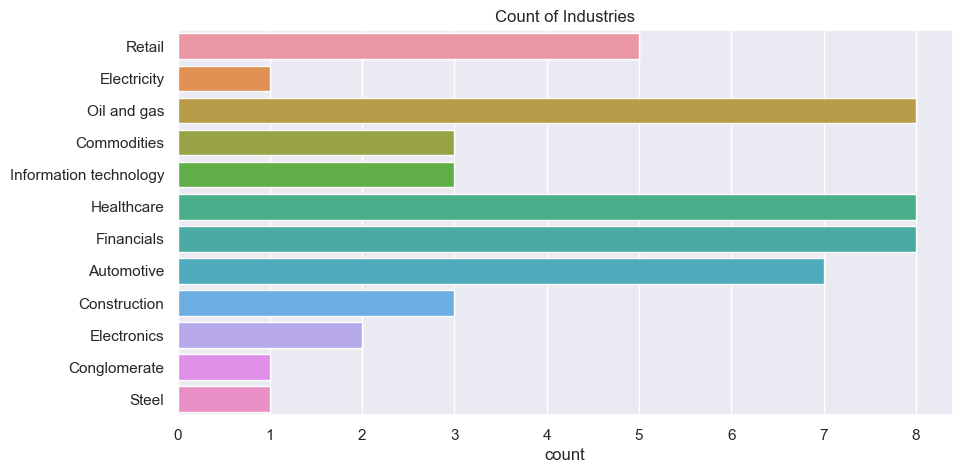

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='industry')
plt.ylabel('')
plt.title('Count of Industries')

Text(0.5, 1.0, 'Count of Headquarters')

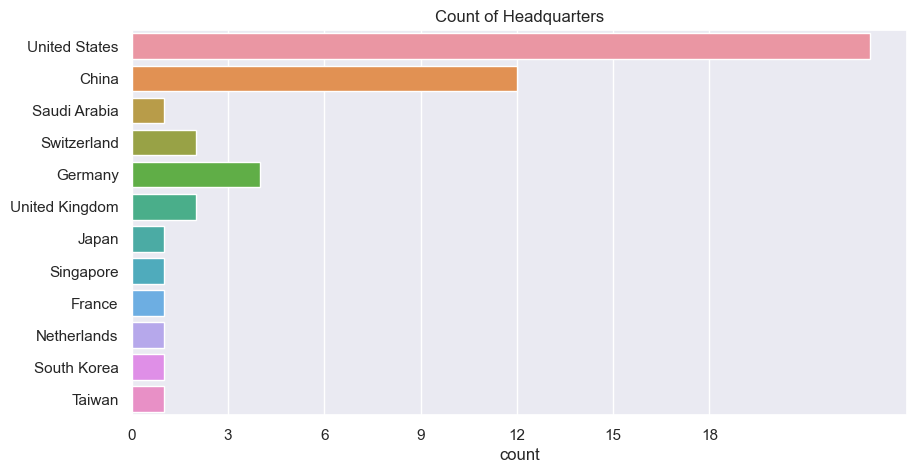

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='headquarters')
plt.ylabel('')
plt.xticks(np.arange(0, 21, 3))
plt.title('Count of Headquarters')

Text(0.5, 0, '')

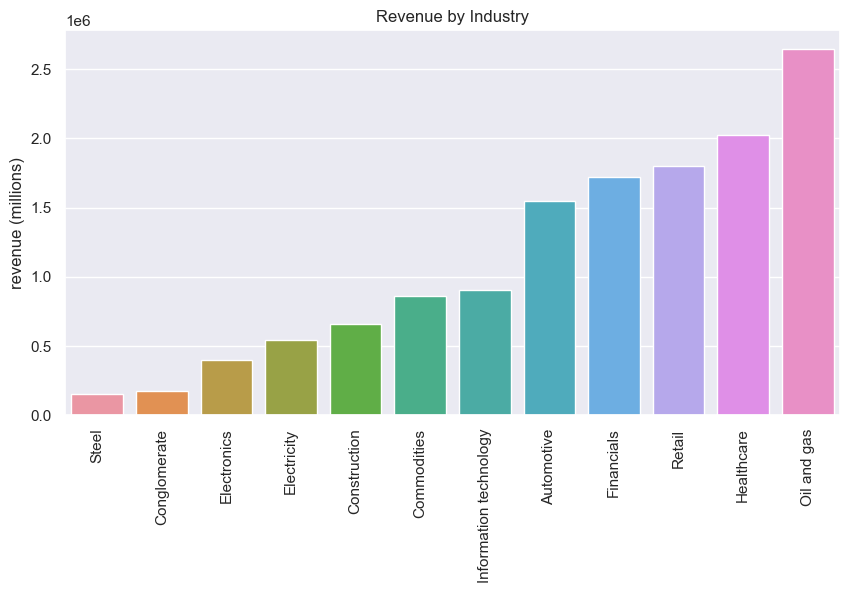

In [21]:
plt.figure(figsize=(10,5))
df_industry = df.groupby('industry').sum().sort_values('revenue (millions)').reset_index()

sns.barplot(x=df_industry.industry,
            y=df_industry['revenue (millions)'])

plt.title('Revenue by Industry')
plt.xticks(rotation=90)
plt.xlabel('')

Text(0.5, 0, '')

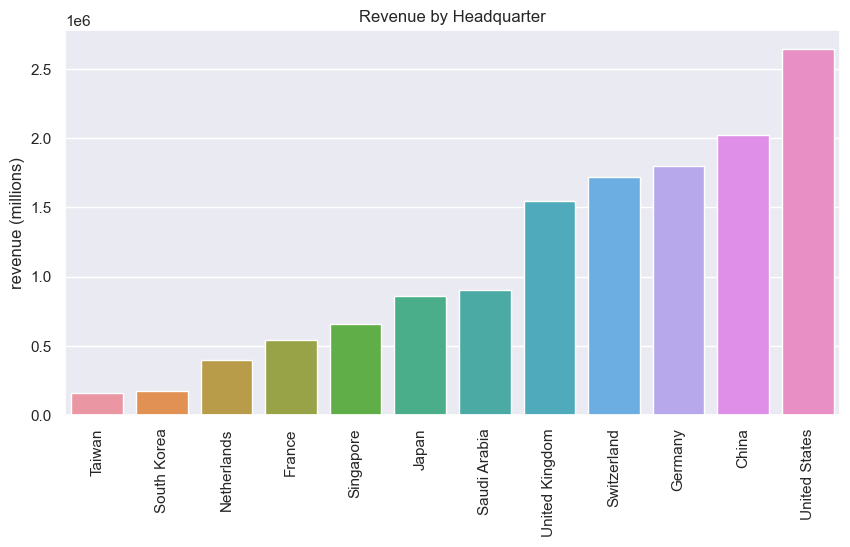

In [36]:
plt.figure(figsize=(10,5))
df_hq = df.groupby('headquarters').sum().sort_values('revenue (millions)').reset_index()

sns.barplot(x=df_hq.headquarters,
            y=df_industry['revenue (millions)'])

plt.title('Revenue by Headquarter')
plt.xticks(rotation=90)
plt.xlabel('')

### Box plots

Text(0.5, 1.0, 'Revenue by Industry')

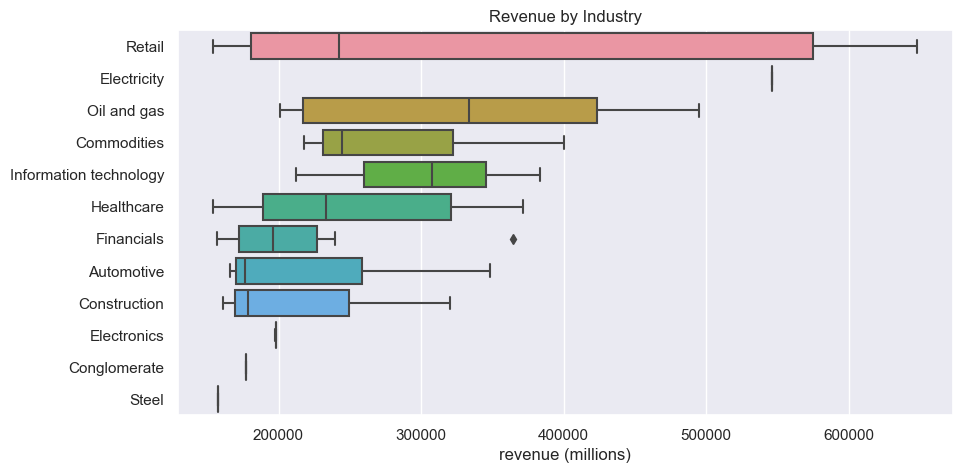

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df.industry,
            x=df['revenue (millions)'])

plt.ylabel('')
plt.title('Revenue by Industry')

Text(0.5, 1.0, 'Revenue by Headquarters')

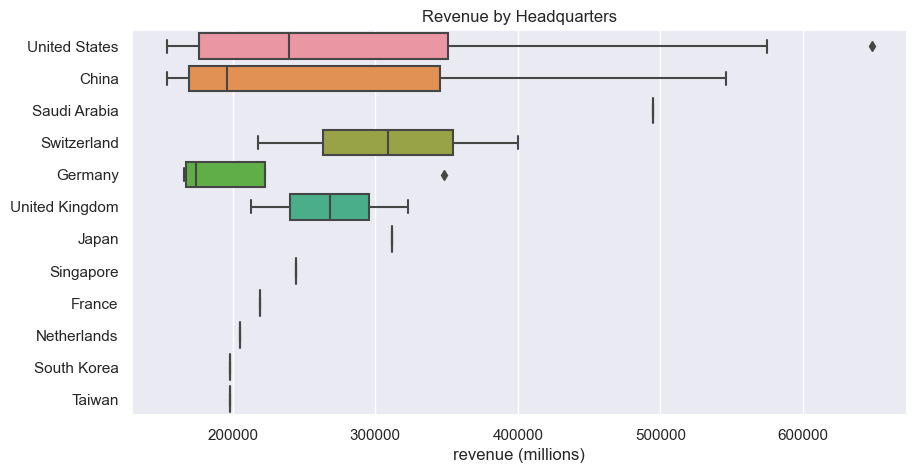

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(y=df.headquarters,
            x=df['revenue (millions)'])

plt.ylabel('')
plt.title('Revenue by Headquarters')

### Seeking for Correlations

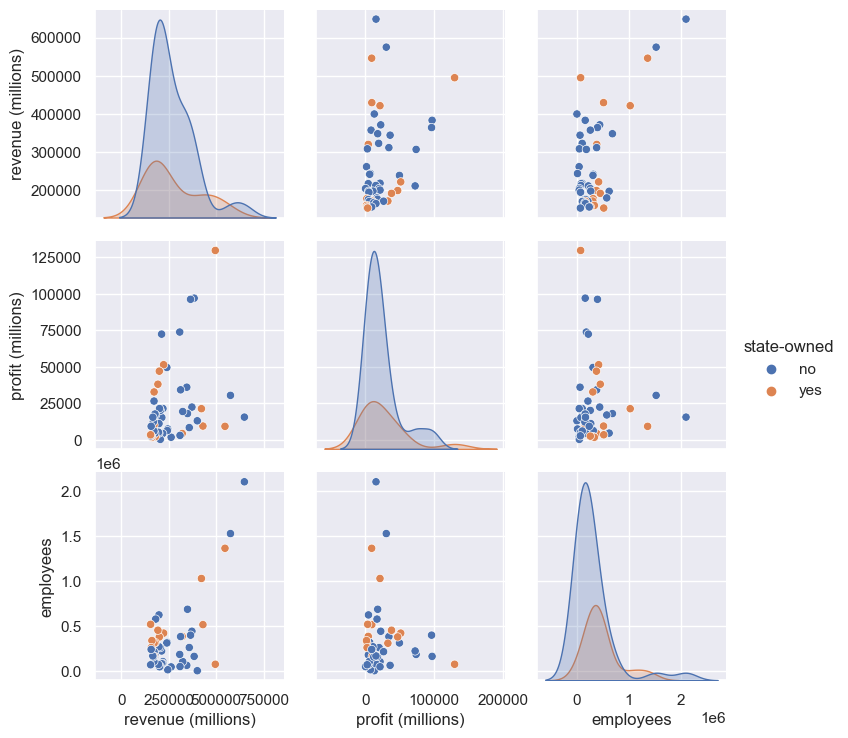

In [25]:
sns.pairplot(df, hue='state-owned')

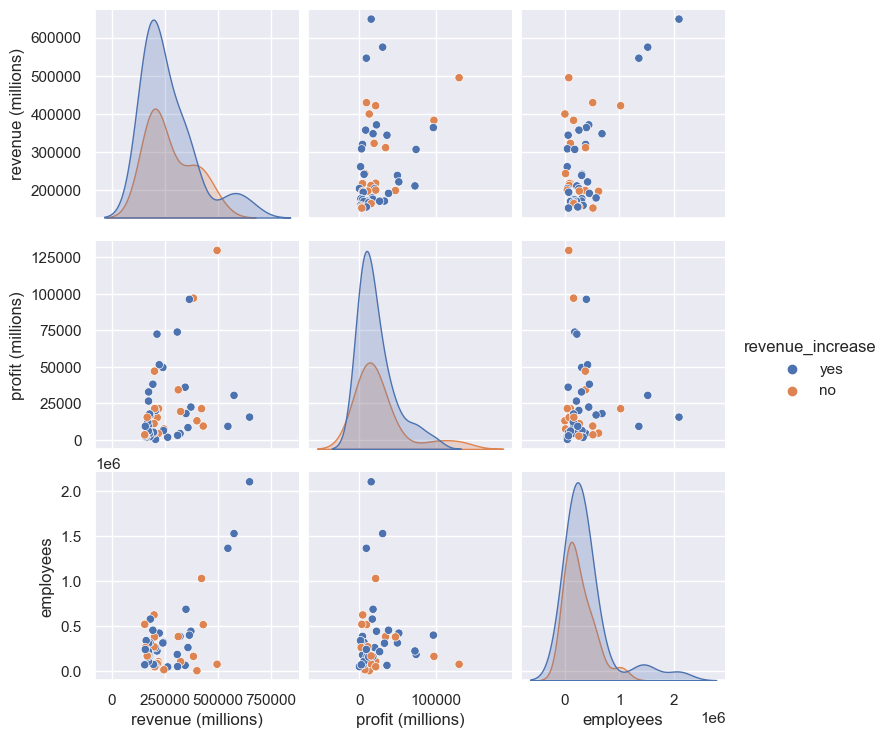

In [26]:
sns.pairplot(df, hue='revenue_increase')

Text(0.5, 1.0, 'Correlation Matrix')

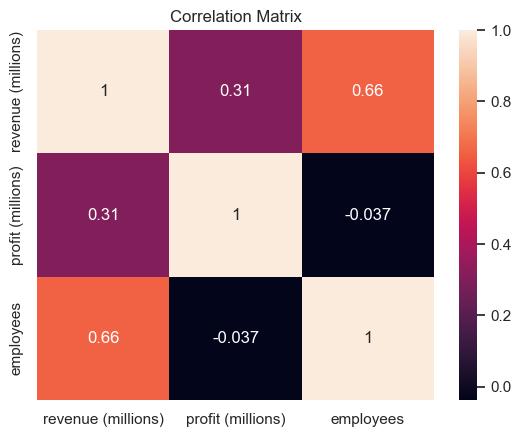

In [35]:
corr_matrix = df.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')

As we can see, there's a relatively strong positive linear relationship at **0.66** between **Employees** and **Revenue** variables - which means the more employees companies hire, the higher revenue they achieve.

## Investigating market inequality: Lorenz curve and Gini coefficient

In [28]:
df_sorted = df.sort_values('revenue (millions)')[['name', 'revenue (millions)']]

In [29]:
new_row = pd.DataFrame([{'name': None, 'revenue (millions)': 0}])
df_sorted = pd.concat([new_row, df_sorted], ignore_index=True)

Text(0.5, 1.0, '50 Largest Companies by Revenue\nGini Coefficient: 0.229')

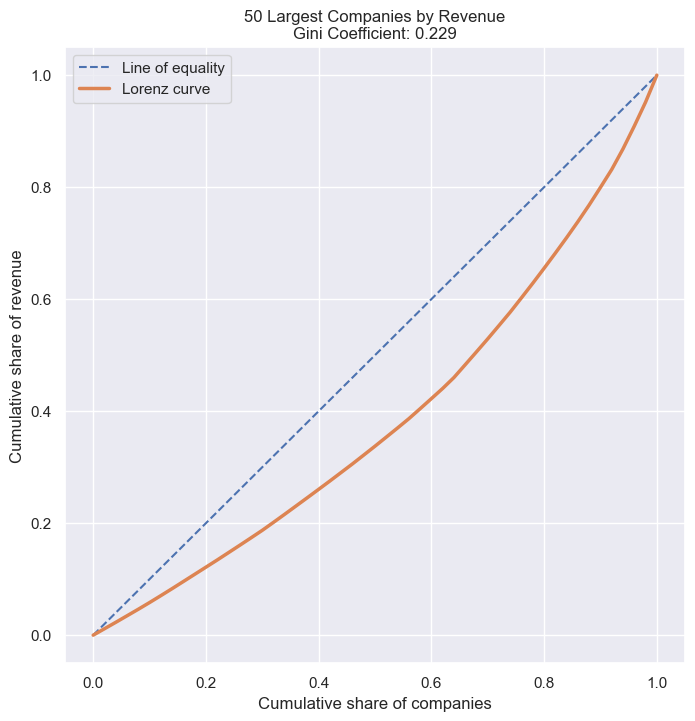

In [30]:
df_sorted['percentage_share'] = df_sorted['revenue (millions)'] / df_sorted.sum()['revenue (millions)']
df_sorted['cum_sum'] = df_sorted['percentage_share'].cumsum()
area = np.trapz(df_sorted.cum_sum, df_sorted.index / (len(df_sorted) - 1))
gini = round(1-2*area, 3)

plt.figure(figsize=(8,8))

plt.plot([0, 1], 
         linestyle='--',
         label='Line of equality')

plt.plot(df_sorted.index / (len(df_sorted) - 1), 
         df_sorted['cum_sum'], linewidth=2.5,
         label='Lorenz curve')

plt.xlabel('Cumulative share of companies')
plt.ylabel('Cumulative share of revenue')
plt.legend()
plt.title(f'50 Largest Companies by Revenue\nGini Coefficient: {gini}')

### Interpretation

The Gini Coefficient ranges from 0 to 1, where 0 represents perfect equality (everyone has the same revenue) and 1 represents maximum inequality (one person has all the revenue, and everyone else has none). **A Gini Coefficient of 0.229 indicates a relatively low level of revenue inequality, meaning that revenue is distributed more evenly among the companies**. Futhermore, the closer the Lorenz Curve is to the Line of Equality, the more evenly revenue is distributed across the population.